# Multivariate Dependencies Beyond Shannon Information

This is a companion Jupyter notebook to the work *Multivariate Dependencies Beyond Shannon Information* by Ryan G. James and James P. Crutchfield. This worksheet was written by Ryan G. James. It primarily makes use of the ``dit`` package for information theory calculations.

## Basic Imports

We first import basic functionality. Further functionality will be imported as needed.

In [2]:
%matplotlib inline

from __future__ import division, print_function

import numpy as np
import matplotlib.pyplot as plt

from dit import ditParams, Distribution
from dit.distconst import uniform

ditParams['repr.print'] = ditParams['print.exact'] = True

## Distributions

Here we define the two distributions to be compared.

In [3]:
from dit.example_dists.mdbsi import dyadic, triadic

dists = [('dyadic', dyadic), ('triadic', triadic)]

## I-Diagrams and X-Diagrams

Here we construct the I- and X-Diagrams of both distributions. The I-Diagram is constructed by considering how the entropies of each variable interact. The X-Diagram is similar, but considers how the extropies of each variable interact.

In [5]:
from dit.profiles import ExtropyPartition, ShannonPartition

def print_partition(dists, partition):
    ps = [str(partition(dist)).split('\n') for _, dist in dists ]
    print('\t' + '\t\t\t\t'.join(name for name, _ in dists))
    for lines in zip(*ps):
        print('\t\t'.join(lines))

In [6]:
print_partition(dists, ShannonPartition)

	dyadic				triadic
+----------+--------+		+----------+--------+
| measure  |  bits  |		| measure  |  bits  |
+----------+--------+		+----------+--------+
| H[X|Y,Z] |  0.000 |		| H[X|Y,Z] |  0.000 |
| H[Y|X,Z] |  0.000 |		| H[Y|X,Z] |  0.000 |
| H[Z|X,Y] |  0.000 |		| H[Z|X,Y] |  0.000 |
| I[X:Y|Z] |  1.000 |		| I[X:Y|Z] |  1.000 |
| I[X:Z|Y] |  1.000 |		| I[X:Z|Y] |  1.000 |
| I[Y:Z|X] |  1.000 |		| I[Y:Z|X] |  1.000 |
| I[X:Y:Z] |  0.000 |		| I[X:Y:Z] |  0.000 |
+----------+--------+		+----------+--------+


Both I-Diagrams are the same. This implies that *no* Shannon measure (entropy, mutual information, conditional mutual information [including the transfer entropy], co-information, etc) can differentiate these patterns of dependency.

In [7]:
print_partition(dists, ExtropyPartition)

	dyadic				triadic
+----------+--------+		+----------+--------+
| measure  | exits  |		| measure  | exits  |
+----------+--------+		+----------+--------+
| X[X|Y,Z] |  0.000 |		| X[X|Y,Z] |  0.000 |
| X[Y|X,Z] |  0.000 |		| X[Y|X,Z] |  0.000 |
| X[Z|X,Y] |  0.000 |		| X[Z|X,Y] |  0.000 |
| X[X:Y|Z] |  0.103 |		| X[X:Y|Z] |  0.103 |
| X[X:Z|Y] |  0.103 |		| X[X:Z|Y] |  0.103 |
| X[Y:Z|X] |  0.103 |		| X[Y:Z|X] |  0.103 |
| X[X:Y:Z] |  1.038 |		| X[X:Y:Z] |  1.038 |
+----------+--------+		+----------+--------+


Similarly, the X-Diagrams are identical and so no extropy-based measure can differentiate the distributions.

## Measures of Mutual and Common Information

We now compute several measures of mutual and common information:

In [8]:
from prettytable import PrettyTable

from dit.multivariate import (entropy,
                              coinformation,
                              total_correlation,
                              dual_total_correlation,
                              independent_information,
                              caekl_mutual_information,
                              interaction_information,
                              intrinsic_total_correlation,
                              gk_common_information,
                              wyner_common_information,
                              exact_common_information,
                              functional_common_information,
                              mss_common_information,
                              tse_complexity,
                             )

from dit.other import (extropy,
                       disequilibrium,
                       perplexity,
                       LMPR_complexity,
                       renyi_entropy,
                       tsallis_entropy,
                      )

In [9]:
def print_table(title, table, dists):
    pt = PrettyTable(field_names = [''] + [name for name, _ in table])
    for name, _ in table:
        pt.float_format[name] = ' 5.{0}'.format(3)
    for name, dist in dists:
        pt.add_row([name] + [measure(dist) for _, measure in table])

    print("\n{}".format(title))
    print(pt.get_string())

### Entropies

Entropies generally capture the uncertainty contained in a distribution. Here, we compute the Shannon entropy, the Renyi entropy of order 2 (also known as the collision entropy), and the Tsallis entropy of order 2. Though we only compute the order 2 values, any order will produce values identical for both distributions.

In [10]:
entropies = [('H', entropy),
             ('Renyi (α=2)', lambda d: renyi_entropy(d, 2)),
             ('Tsallis (q=2)', lambda d: tsallis_entropy(d, 2)),
            ]

In [11]:
print_table('Entropies', entropies, dists)


Entropies
+---------+--------+-------------+---------------+
|         |   H    | Renyi (α=2) | Tsallis (q=2) |
+---------+--------+-------------+---------------+
|  dyadic |  3.000 |     3.0     |      0.875    |
| triadic |  3.000 |     3.0     |      0.875    |
+---------+--------+-------------+---------------+


The entropies for both distributions are indentical. This is not surprising: they have the same probability mass function.

### Mutual Informations

Mutual informations are multivariate generalizations of the standard Shannon mutual information. By far, the most widely used (and often simply assumed to be the only) generalization is the total correlation, sometimes called the multi-information. It is defined as:
$$
 T[\mathbf{X}] = \sum H[X_i] - H[\mathbf{X}] = \sum p(\mathbf{x}) \log_2 \frac{p(\mathbf{x})}{p(x_1)p(x_2)\ldots p(x_n)}
$$

Other generalizations exist, though, including the co-information, the dual total correlation, and the CAEKL mutual information.

In [12]:
mutual_informations = [('I', coinformation),
                       ('T', total_correlation),
                       ('B', dual_total_correlation),
                       ('J', caekl_mutual_information),
                       ('II', interaction_information),
                      ]

In [13]:
print_table('Mutual Informations', mutual_informations, dists)


Mutual Informations
+---------+--------+--------+--------+--------+--------+
|         |   I    |   T    |   B    |   J    |   II   |
+---------+--------+--------+--------+--------+--------+
|  dyadic |  0.000 |  3.000 |  3.000 |  1.500 |  0.000 |
| triadic |  0.000 |  3.000 |  3.000 |  1.500 |  0.000 |
+---------+--------+--------+--------+--------+--------+


The equivalence of all these generalizations is not surprising: Each of them can be defined as a function of the I-diagram, and so must be identical here.

### Common Informations

Common informations are generally defined using an auxilliary random variable which captures some amount of information shared by the variables of interest. For all but the Gács-Körner common information, that shared information is the dual total correlation.

In [14]:
common_informations = [('K', gk_common_information),
                       ('C', lambda d: wyner_common_information(d, nhops=1, polish=False)),
                       ('G', lambda d: exact_common_information(d, nhops=1, polish=False)),
                       ('F', functional_common_information),
                       ('M', mss_common_information),
                      ]

In [15]:
print_table('Common Informations', common_informations, dists)


Common Informations
+---------+--------+--------+--------+--------+--------+
|         |   K    |   C    |   G    |   F    |   M    |
+---------+--------+--------+--------+--------+--------+
|  dyadic |  0.000 |  3.000 |  3.000 |  3.000 |  3.000 |
| triadic |  1.000 |  3.000 |  3.000 |  3.000 |  3.000 |
+---------+--------+--------+--------+--------+--------+


As it turns out, only the Gács-Körner common information, `K`, distinguishes the two.

### Other Measures

Here we list a variety of other information measures.

In [16]:
other_measures = [('IMI', lambda d: intrinsic_total_correlation(d, ['X', 'Y'], 'Z')),
                  ('X', extropy),
                  ('R', independent_information),
                  ('P', perplexity),
                  ('D', disequilibrium),
                  ('LMRP', LMPR_complexity),
                  ('TSE', tse_complexity),
                 ]

In [17]:
print_table('Other Measures', other_measures, dists)


Other Measures
+---------+--------+--------+--------+--------+--------+--------+--------+
|         |  IMI   |   X    |   R    |   P    |   D    |  LMRP  |  TSE   |
+---------+--------+--------+--------+--------+--------+--------+--------+
|  dyadic |  1.000 |  1.349 |  0.000 |  8.000 |  0.761 |  0.381 |  2.000 |
| triadic |  0.000 |  1.349 |  0.000 |  8.000 |  0.761 |  0.381 |  2.000 |
+---------+--------+--------+--------+--------+--------+--------+--------+


Several other measures fail to differentiate our two distributions. For many of these (`X`, `P`, `D`, `LMRP`) this is because they are defined relative to the probability mass function. For the others, it is due to the equality of the I-diagrams. Only the intrinsic mutual information, `IMI`, can distinguish the two.

## Information Profiles

Lastly, we consider several "profiles" of the information.

In [18]:
from dit.profiles import *

def plot_profile(dists, profile):
    n = len(dists)
    plt.figure(figsize=(8*n, 6))
    ent = max(entropy(dist) for _, dist in dists)
    for i, (name, dist) in enumerate(dists):
        ax = plt.subplot(1, n, i+1)
        profile(dist).draw(ax=ax)
        if profile not in [EntropyTriangle, EntropyTriangle2]:
            ax.set_ylim((-0.1, ent + 0.1))
        ax.set_title(name)

### Complexity Profile

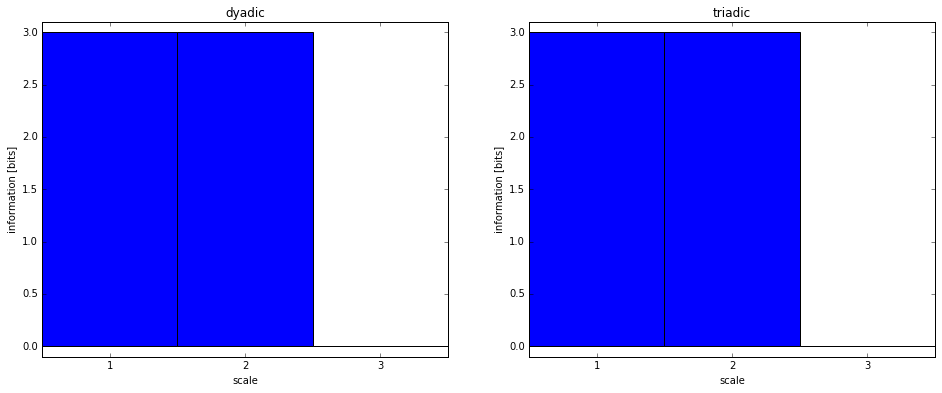

In [19]:
plot_profile(dists, ComplexityProfile)

Once again, these two profiles are identical due to the I-Diagrams being identical. The complexity profile incorrectly suggests that there is no information at the scale of 3 variables.

### Marginal Utility of Information

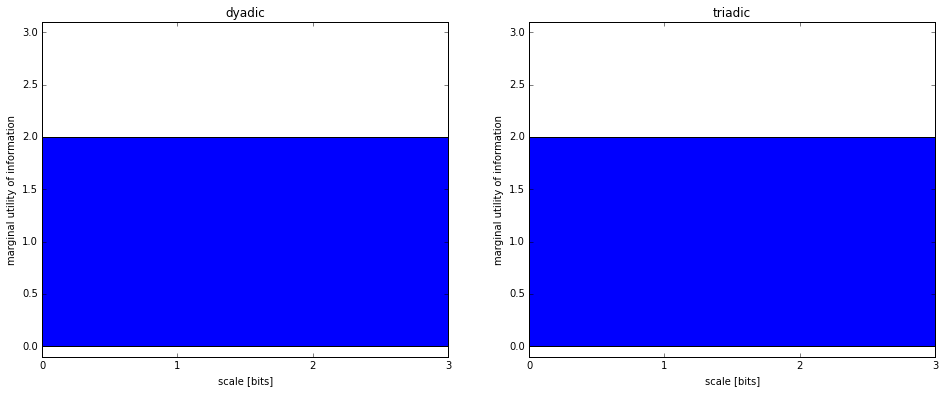

In [20]:
plot_profile(dists, MUIProfile)

The marginal utility of information is based on a linear programming problem with constrains related to values from the I-Diagram, and so here again the two distributions are undifferentiated.

### Connected Informations

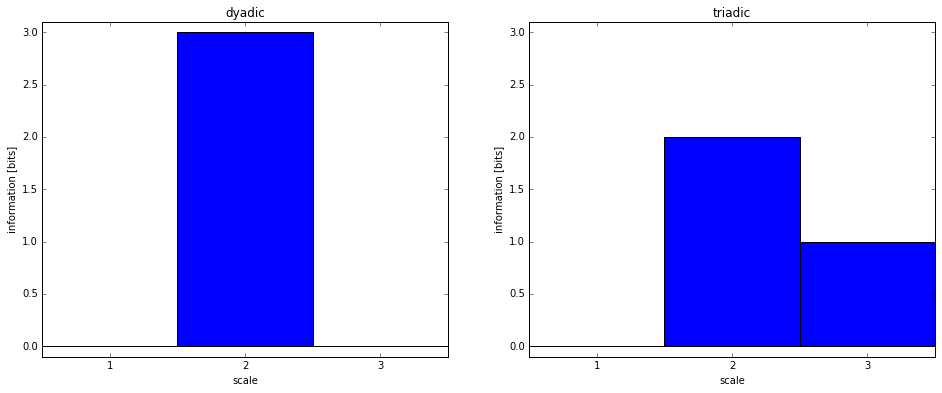

In [21]:
plot_profile(dists, SchneidmanProfile)

The connected informations are based on differences between maximum entropy distributions with differing $k$-way marginal distributions fixed. Here, the two distributions are differentiated 

### Multivariate Entropy Triangle

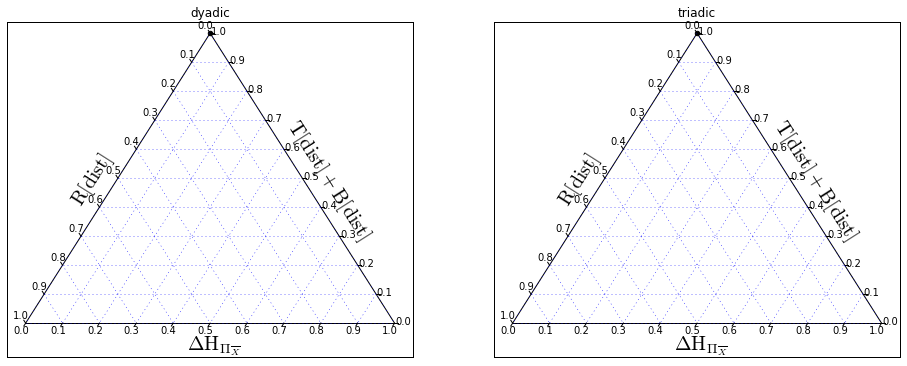

In [22]:
plot_profile(dists, EntropyTriangle)

Both distributions are at an idential location in the multivariate entropy triangle.

## Partial Information

We next consider a variety of partial information decompositions.

In [23]:
from dit.algorithms.pid_broja import MaximumConditionalEntropy, pi_decomp

In [24]:
def get_pid(d):
    x = MaximumConditionalEntropy(d, [[0], [1]], [2], extra_constraints=True)
    pmf_opt, obj = x.optimize()
    d_opt = x.dist.copy()
    d_opt.pmf[:] = pmf_opt
    S, U0, U1, R = pi_decomp(x.dist, d_opt)
    return (R, U0, U1, S)

In [25]:
def make_pid_table():
    new_dists = [ (n, d.copy()) for n, d in dists ]
    for _, d in new_dists:
        d._rvs = None
        d._rv_mode = 'indices'

    pt = PrettyTable(field_names = [''] + [name for name, _ in new_dists])
    
    for name, _ in dists:
        pt.float_format[name] = ' 5.{0}'.format(3)
        
    Rs, U0s, U1s, Ss = zip(*[ get_pid(d) for _, d in new_dists ])
    meass = [('R', Rs), ('U0', U0s), ('U1', U1s), ('S', Ss)]
        
    for name, meas in meass:
        pt.add_row([name] + list(meas))

    print(pt.get_string())

In [26]:
make_pid_table()

Only converged to xdiff=0.0002499945 after 2000 iterations. Desired: 0.0001


+----+--------+---------+
|    | dyadic | triadic |
+----+--------+---------+
| R  |  0.000 |   1.000 |
| U0 |  1.000 |   0.000 |
| U1 |  1.000 |   0.000 |
| S  | -0.000 |   1.000 |
+----+--------+---------+


Here we see that the PID determines that in dyadic distribution two random variables uniquely contribute a bit of information to the third, whereas in the triadic distribution two random variables redundantly influene the third with one bit, and synergistically with another.

## Multivariate Extensions

In [27]:
from itertools import product

In [28]:
outcomes_a = [
    (0,0,0,0),
    (0,2,3,2),
    (1,0,2,1),
    (1,2,1,3),
    (2,1,3,3),
    (2,3,0,1),
    (3,1,1,2),
    (3,3,2,0),
]
outcomes_b = [
    (0,0,0,0),
    (0,0,1,1),
    (0,1,0,1),
    (0,1,1,0),
    (1,0,0,1),
    (1,0,1,0),
    (1,1,0,0),
    (1,1,1,1),
]

outcomes = [ tuple([2*a+b for a, b in zip(a_, b_)]) for a_, b_ in product(outcomes_a, outcomes_b) ]
quadradic = uniform(outcomes)

In [29]:
dyadic2 = uniform([(4*a+2*c+e, 4*a+2*d+f, 4*b+2*c+f, 4*b+2*d+e) for a, b, c, d, e, f in product([0,1], repeat=6)])

In [30]:
dists2 = [('dyadic2', dyadic2), ('quadradic', quadradic)]

In [31]:
print_partition(dists2, ShannonPartition)

	dyadic2				quadradic
+------------+--------+		+------------+--------+
|  measure   |  bits  |		|  measure   |  bits  |
+------------+--------+		+------------+--------+
| H[0|1,2,3] |  0.000 |		| H[0|1,2,3] |  0.000 |
| H[1|0,2,3] |  0.000 |		| H[1|0,2,3] |  0.000 |
| H[2|0,1,3] |  0.000 |		| H[2|0,1,3] |  0.000 |
| H[3|0,1,2] |  0.000 |		| H[3|0,1,2] |  0.000 |
| I[0:1|2,3] |  1.000 |		| I[0:1|2,3] |  1.000 |
| I[0:2|1,3] |  1.000 |		| I[0:2|1,3] |  1.000 |
| I[0:3|1,2] |  1.000 |		| I[0:3|1,2] |  1.000 |
| I[1:2|0,3] |  1.000 |		| I[1:2|0,3] |  1.000 |
| I[1:3|0,2] |  1.000 |		| I[1:3|0,2] |  1.000 |
| I[2:3|0,1] |  1.000 |		| I[2:3|0,1] |  1.000 |
| I[0:1:2|3] |  0.000 |		| I[0:1:2|3] |  0.000 |
| I[0:1:3|2] |  0.000 |		| I[0:1:3|2] |  0.000 |
| I[0:2:3|1] |  0.000 |		| I[0:2:3|1] |  0.000 |
| I[1:2:3|0] |  0.000 |		| I[1:2:3|0] |  0.000 |
| I[0:1:2:3] |  0.000 |		| I[0:1:2:3] |  0.000 |
+------------+--------+		+------------+--------+


In [32]:
print_partition(dists2, ExtropyPartition)

	dyadic2				quadradic
+------------+--------+		+------------+--------+
|  measure   | exits  |		|  measure   | exits  |
+------------+--------+		+------------+--------+
| X[0|1,2,3] |  0.000 |		| X[0|1,2,3] |  0.000 |
| X[1|0,2,3] |  0.000 |		| X[1|0,2,3] |  0.000 |
| X[2|0,1,3] |  0.000 |		| X[2|0,1,3] |  0.000 |
| X[3|0,1,2] |  0.000 |		| X[3|0,1,2] |  0.000 |
| X[0:1|2,3] |  0.011 |		| X[0:1|2,3] |  0.011 |
| X[0:2|1,3] |  0.011 |		| X[0:2|1,3] |  0.011 |
| X[0:3|1,2] |  0.011 |		| X[0:3|1,2] |  0.011 |
| X[1:2|0,3] |  0.011 |		| X[1:2|0,3] |  0.011 |
| X[1:3|0,2] |  0.011 |		| X[1:3|0,2] |  0.011 |
| X[2:3|0,1] |  0.011 |		| X[2:3|0,1] |  0.011 |
| X[0:1:2|3] |  0.048 |		| X[0:1:2|3] |  0.048 |
| X[0:1:3|2] |  0.048 |		| X[0:1:3|2] |  0.048 |
| X[0:2:3|1] |  0.048 |		| X[0:2:3|1] |  0.048 |
| X[1:2:3|0] |  0.048 |		| X[1:2:3|0] |  0.048 |
| X[0:1:2:3] |  1.169 |		| X[0:1:2:3] |  1.169 |
+------------+--------+		+------------+--------+


In [33]:
print_table('Entropies', entropies, dists2)


Entropies
+-----------+--------+-------------+---------------+
|           |   H    | Renyi (α=2) | Tsallis (q=2) |
+-----------+--------+-------------+---------------+
|  dyadic2  |  6.000 |     6.0     |      0.984    |
| quadradic |  6.000 |     6.0     |      0.984    |
+-----------+--------+-------------+---------------+


In [34]:
print_table('Mutual Informations', mutual_informations, dists2)


Mutual Informations
+-----------+--------+--------+--------+--------+--------+
|           |   I    |   T    |   B    |   J    |   II   |
+-----------+--------+--------+--------+--------+--------+
|  dyadic2  |  0.000 |  6.000 |  6.000 |  2.000 |  0.000 |
| quadradic |  0.000 |  6.000 |  6.000 |  2.000 |  0.000 |
+-----------+--------+--------+--------+--------+--------+


In [35]:
print_table('Common Informations', common_informations, dists2)


Common Informations
+-----------+--------+--------+--------+--------+--------+
|           |   K    |   C    |   G    |   F    |   M    |
+-----------+--------+--------+--------+--------+--------+
|  dyadic2  |  0.000 |  6.000 |  6.000 |  6.000 |  6.000 |
| quadradic |  0.000 |  6.000 |  6.000 |  6.000 |  6.000 |
+-----------+--------+--------+--------+--------+--------+


In [36]:
other_measures[0] = ('IMI', lambda d: intrinsic_total_correlation(d, [[0], [1], [2]], [3]))
print_table('Other Measures', other_measures, dists2)


Other Measures
+-----------+--------+--------+--------+---------+--------+--------+--------+
|           |  IMI   |   X    |   R    |    P    |   D    |  LMRP  |  TSE   |
+-----------+--------+--------+--------+---------+--------+--------+--------+
|  dyadic2  |  3.000 |  1.431 |  0.000 |  64.000 |  0.943 |  0.472 |  5.000 |
| quadradic |  2.000 |  1.431 |  0.000 |  64.000 |  0.943 |  0.472 |  5.000 |
+-----------+--------+--------+--------+---------+--------+--------+--------+


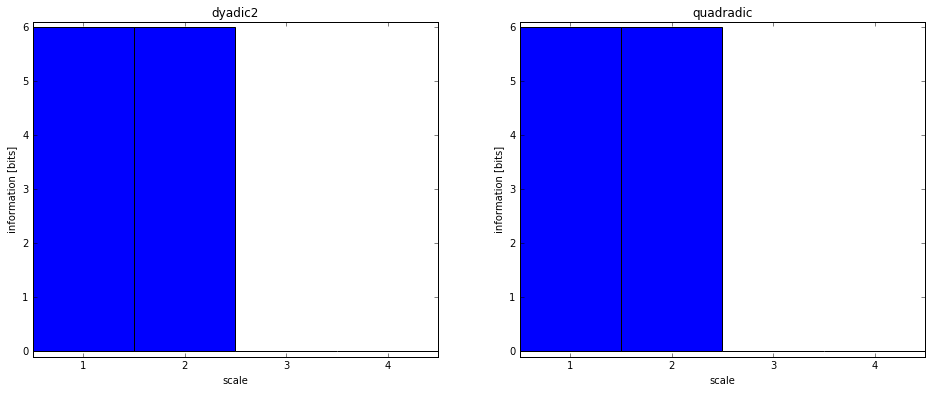

In [37]:
plot_profile(dists2, ComplexityProfile)

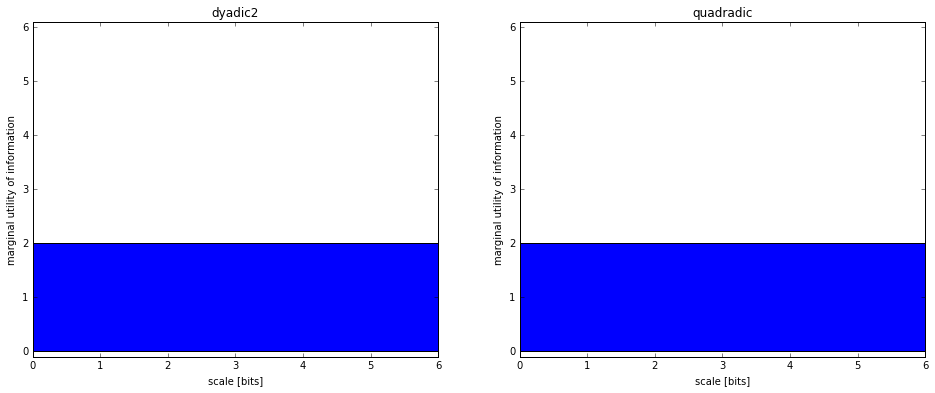

In [38]:
plot_profile(dists2, MUIProfile)

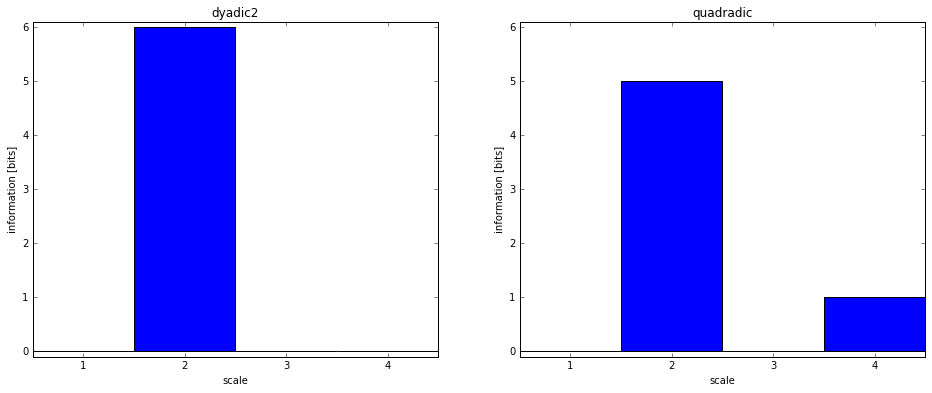

In [39]:
plot_profile(dists2, SchneidmanProfile)

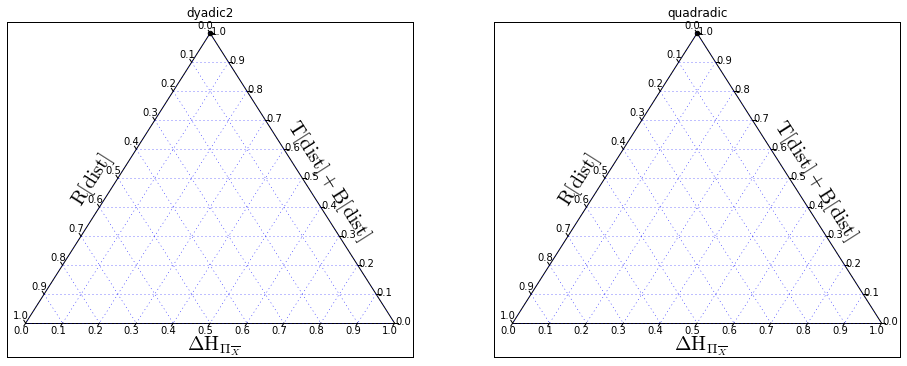

In [40]:
plot_profile(dists2, EntropyTriangle)